In [1]:
import os

from warnings import simplefilter

import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from dython.nominal import associations
from sklearn.preprocessing import Normalizer, StandardScaler

simplefilter('ignore')

In [2]:
df = pd.read_csv('data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let's take a look over the data, we can see that it's just under 1600 rows of data, and there seem to be no null values in any of the columns. As this dataset is from Kaggle and they do minor cleanup for you this is not unexpected.

In [3]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The column we're going to be predicting on is the quality column and looking at the correlation it seems like the highest correlation for quality is alcohol, followed by sulphates. After that the next strongest is a negative correlation between volatile acidity.2

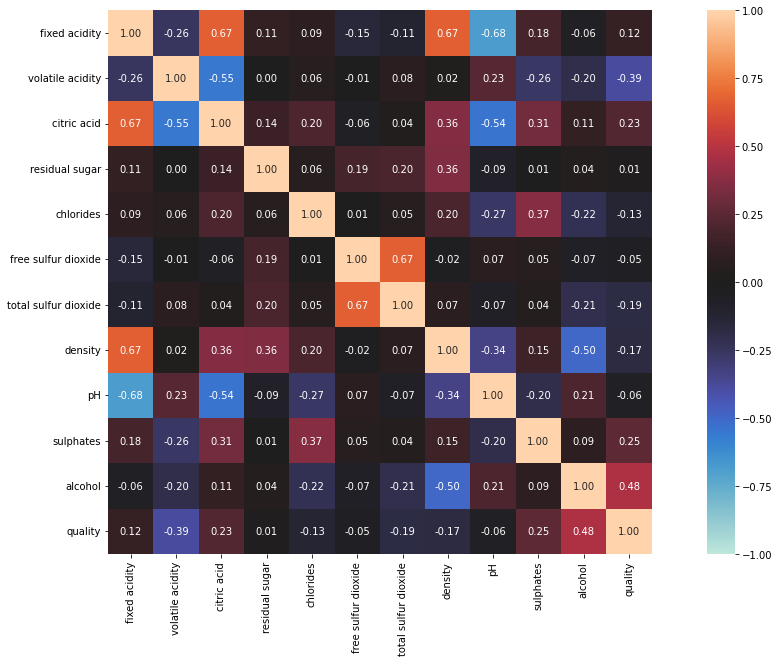

In [4]:
associations(df, figsize=(20, 10), num_num_assoc='pearson')
plt.show()

Let's create a few functions to help clean up the data. First we're going to normalize and scale the data, then we'll remove some outliers from the data.

In [5]:
def normalize_scale(df):

    normalizer = Normalizer()
    scaler = StandardScaler()

    for col in df.columns.values:
        normalizer_array = normalizer.fit_transform(df[col].array.reshape(1,-1))
        df.loc[:, col] = scaler.fit_transform(normalizer_array.reshape(-1, 1))

    return df

def remove_outliers(df):
    df = df[(np.abs(sp.stats.zscore(df)) < 3).all(axis=1)]
    return df

We're going to remove the quality column as we don't want to change that column currently, and let's also just take a look at our data on a box plot. Right now it's hard to tell exactly what's going on with most of the data. Both free sulfer dioxide and total sulfer dioxide are dominating the other columns data

In [6]:
y = df.pop('quality')

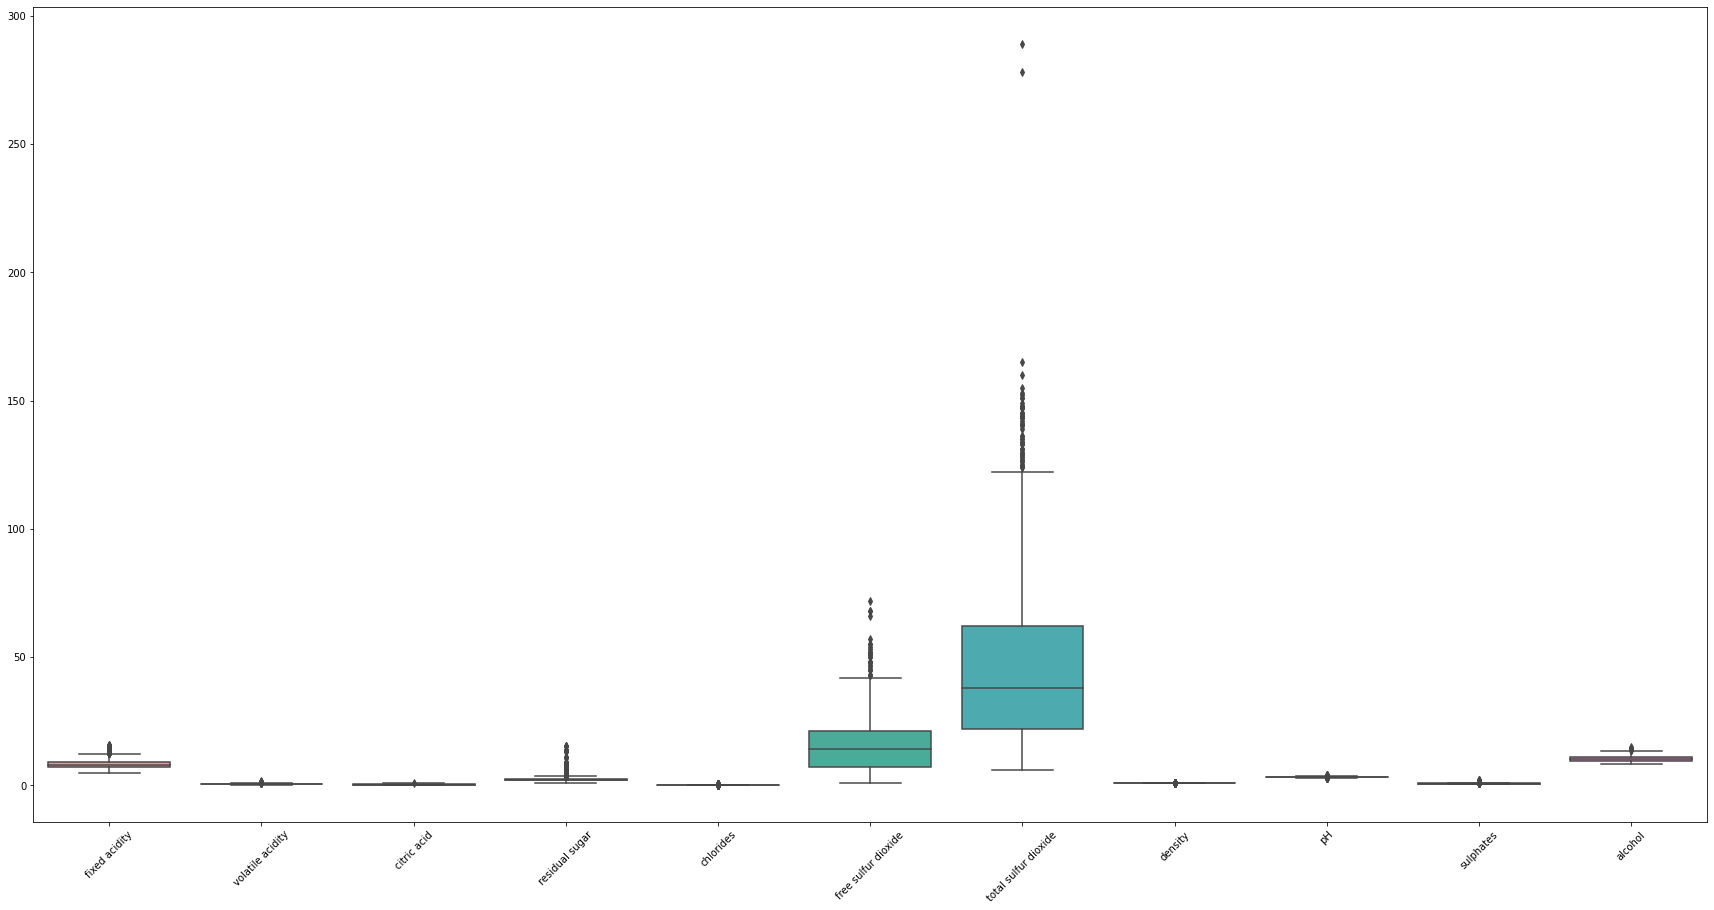

In [7]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.boxplot(data=df, ax=ax)
plt.show()

Since we're having such an issue seeing what's happening with the other data let's take a minute to normalize and scale the data

In [8]:
df = normalize_scale(df)

Now that it's scaled we can see what's happening. We can see that residual sugars and chloride have quite a few outliers in their data, as well as total sulfer dioxide and sulphates having a few.

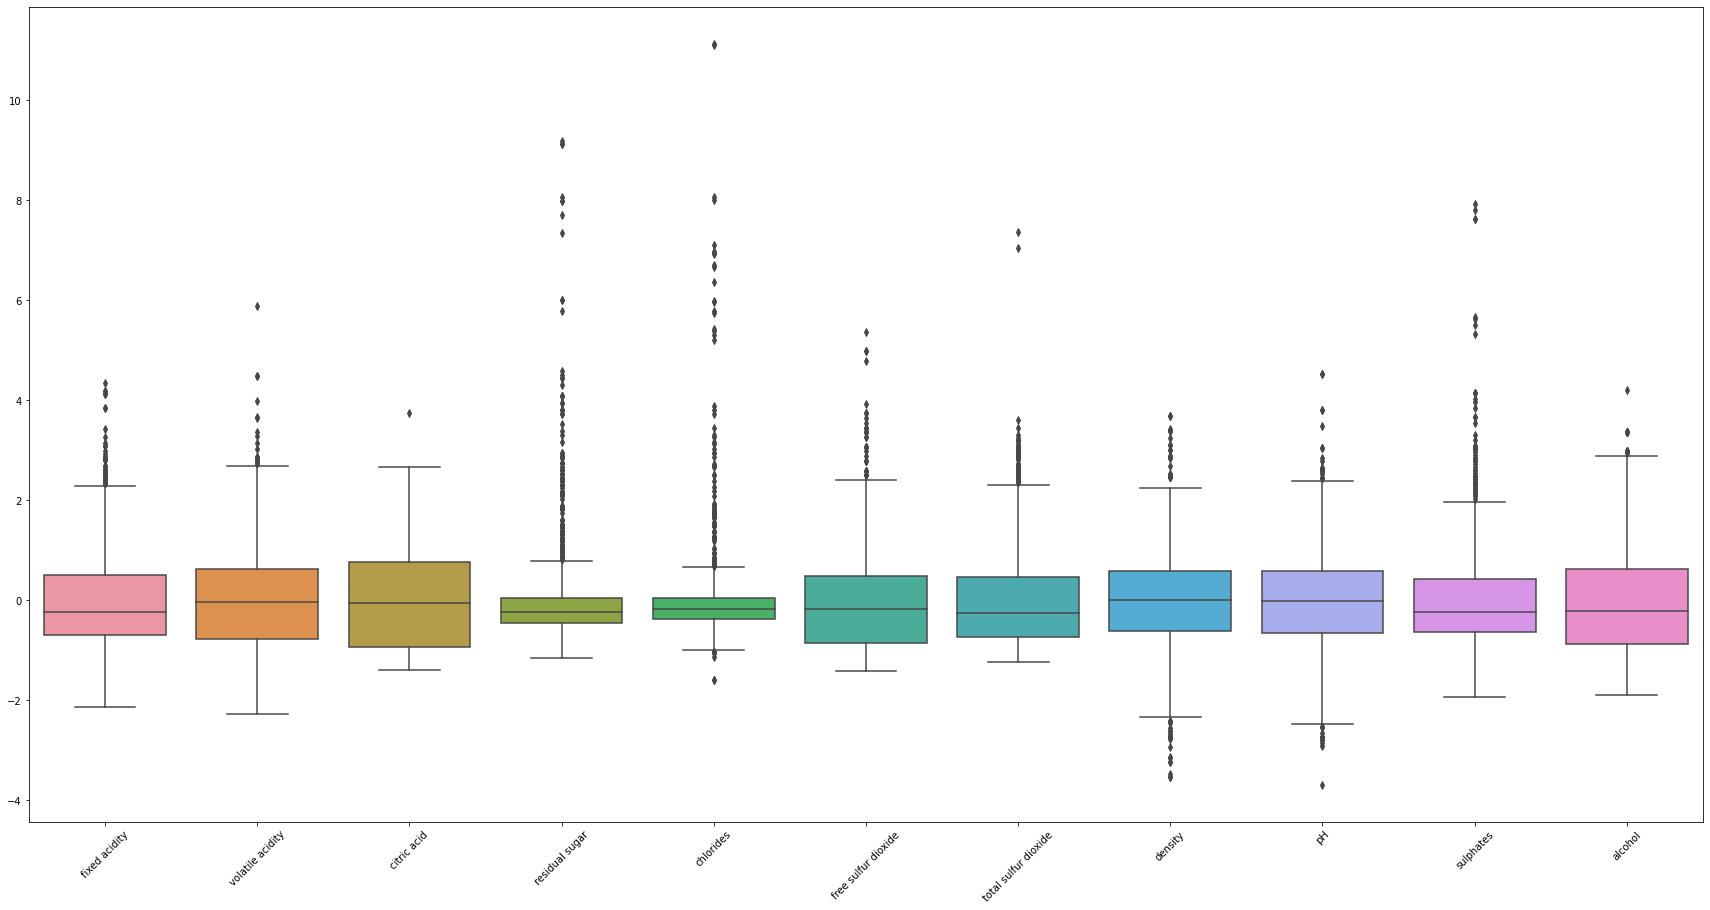

In [9]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.boxplot(data=df, ax=ax)
plt.show()

Once we remove the outliers we can see we've dropped a few rows from our data but looking at the new box chart we can also see that even though we still have some outliers it's much more managable.

In [10]:
df = remove_outliers(df)
df.shape

(1458, 11)

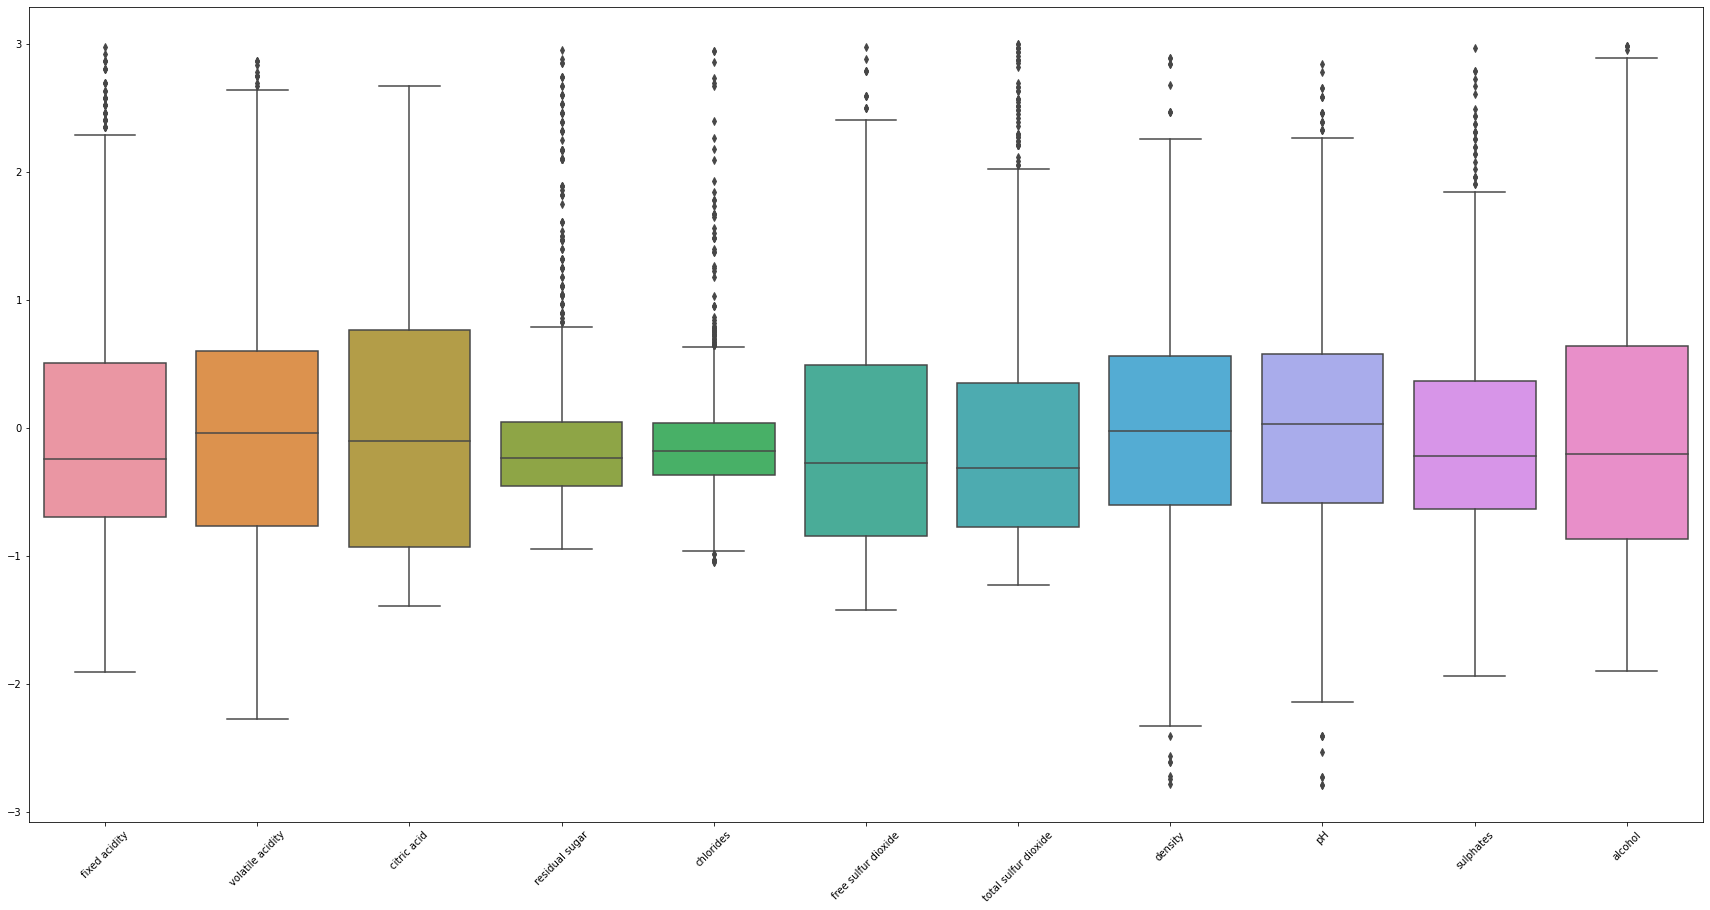

In [11]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.boxplot(data=df, ax=ax)
plt.show()

And taking a look at correlation we can see that for the most part this has made correlation slightly stronger except for the cases of volatile acidity and chlorides which both have become slightly less strongly negatively correlated

In [14]:
df = pd.merge(df, y, left_index=True, right_index=True)

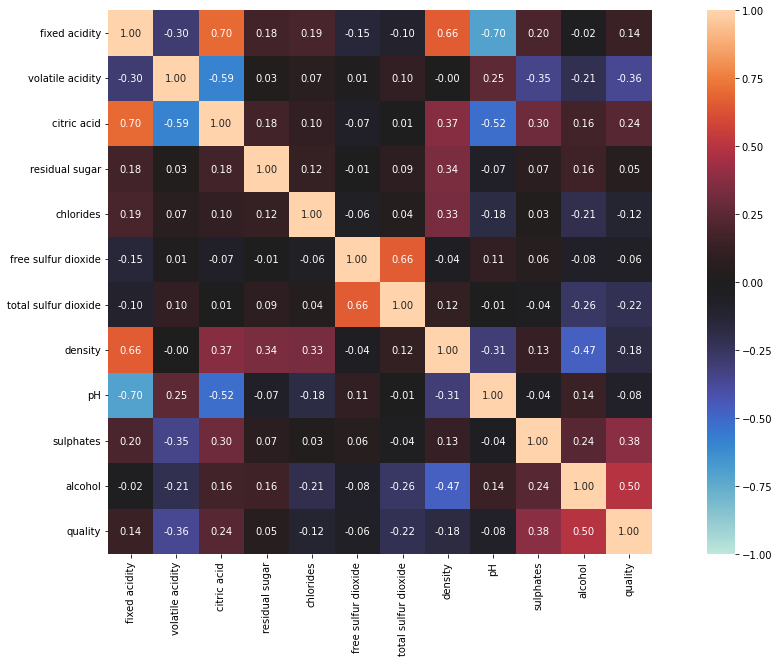

In [15]:
associations(df, figsize=(20, 10), num_num_assoc='pearson')
plt.show()